<a href="https://colab.research.google.com/github/dakilaledesma/NCBG/blob/main/test/Multilabel_Parts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
! unzip -q /content/drive/MyDrive/UNC/NCBG/sept13_testset.zip -d /content
# ! unzip -q /content/drive/MyDrive/UNC/NCBG/sept1_classif_training.zip -d /content

CPU times: user 414 ms, sys: 61.2 ms, total: 475 ms
Wall time: 1min


In [2]:
! mv /content/content/images /content/images
! rm -rf /content/content

In [3]:
! cp -r drive/MyDrive/UNC/NCBG/mp_2b/ ./mp_2b

In [4]:
! pip install -U tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 17 kB/s 
     |████████████████████████████████| 5.9 MB 27.6 MB/s 
     |████████████████████████████████| 1.7 MB 35.3 MB/s 
     |████████████████████████████████| 438 kB 52.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [5]:
! apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 14s (31.6 MB/s)
(Reading database ... 155569 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155547 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+

In [6]:
! pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 15.4 MB/s 


In [7]:
class_dict = {'aspect': 0, 'bud': 1, 'fall-color': 2, 'flower': 3, 'fruit': 4, 'leaf': 5, 'leaf-underside': 6, 'other': 7, 'root': 8, 'seed': 9, 'side-by-side': 10, 'stem': 11, 'venation': 12, 'vestiture': 13, 'whole-plant': 14}
class_dict = {v: k for k, v in class_dict.items()}

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications.convnext import ConvNeXtLarge
from tensorflow.keras.layers import Dense
import tensorflow_addons as tfa
import keras

opt = tfa.optimizers.AdaBelief(learning_rate=1e-3)
custom_objects = {"AdaBelief": opt}

with keras.utils.custom_object_scope(custom_objects):
  model = load_model("mp_2b")

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


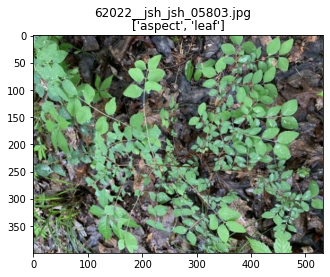

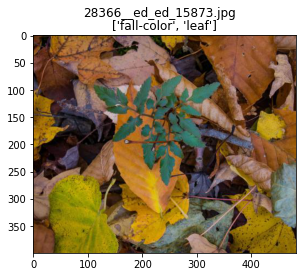

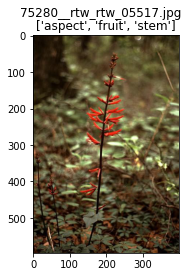

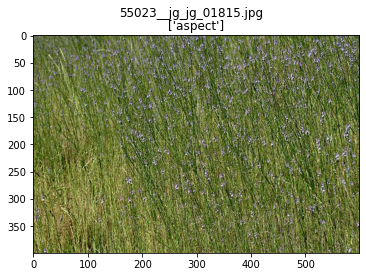

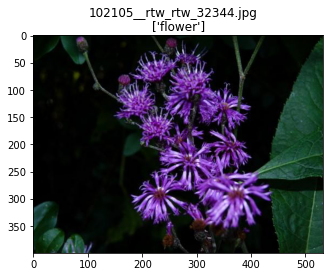

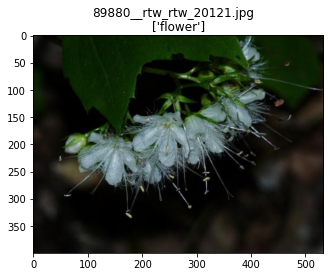

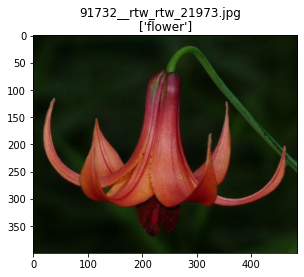

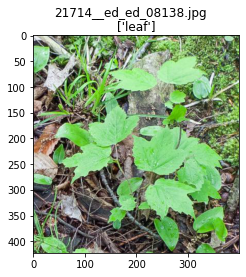

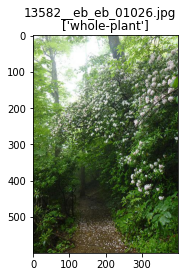

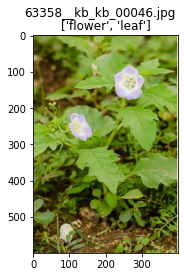

<Figure size 432x288 with 0 Axes>

In [10]:
from glob import glob
import os
from PIL import Image, UnidentifiedImageError
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

for im_fn in list(glob("images/*.*"))[10:20]:
  # bn = os.path.basename(im_fn).split("__")[1].replace(".jpg", '')
  bn = os.path.basename(im_fn).replace(".jpg", '')
  bn = f"{bn}.jpg"
  im_o = Image.open(im_fn)
  im = im_o.resize((448, 448))
  im = np.array(im, dtype=int)
  im = np.reshape(im, (1, 448, 448, 3))

  pred = np.array(model(im))
  pred = [round(v, 4) for v in pred[0]]
  pred_labels = [class_dict[idx] for idx, v in enumerate(pred) if v > 0.1]

  plt.imshow(im_o)
  plt.title(pred_labels)
  plt.suptitle(bn)
  plt.show()
  plt.clf()